
![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset
crimes = pd.read_csv("data/crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


## Descriptives
### Describe data types

In [2]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247988 entries, 0 to 247987
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         247988 non-null  int64         
 1   Date Rptd     247988 non-null  datetime64[ns]
 2   DATE OCC      247988 non-null  datetime64[ns]
 3   TIME OCC      247988 non-null  object        
 4   AREA NAME     247988 non-null  object        
 5   Crm Cd Desc   247988 non-null  object        
 6   Vict Age      247988 non-null  int64         
 7   Vict Sex      215740 non-null  object        
 8   Vict Descent  215739 non-null  object        
 9   Weapon Desc   80087 non-null   object        
 10  Status Desc   247988 non-null  object        
 11  LOCATION      247988 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 22.7+ MB


# Crime Frequency
### Distribution of the occurances per hour

<Axes: xlabel='HOUR OCC', ylabel='count'>

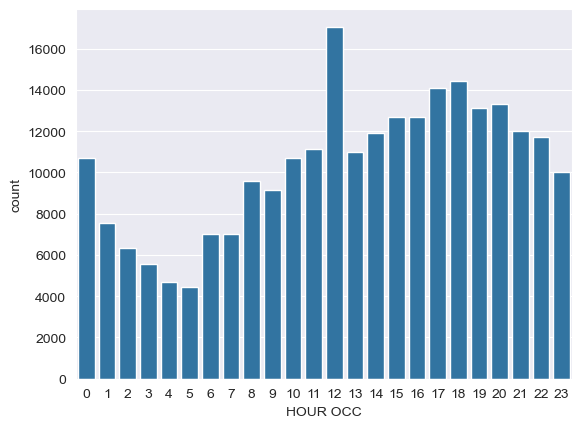

In [3]:
# Extract first two characters of "TIME OCC" to get hour. Set the type as an integer
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)

# Show the distribution of the "HOUR OCC" column
sns.countplot(x="HOUR OCC", data=crimes)

### Which hour sees the most crimes comitted?

In [4]:
# Which hour sees the most crimes committed?
peak_crime_hour = crimes.value_counts("HOUR OCC").index[0]

# How many crimes have been committed?
peak_crime_hour_count = crimes.value_counts("HOUR OCC").values[0]

In [5]:
print(f"At {peak_crime_hour}:00, {peak_crime_hour_count} crimes have been committed, making this the hour with the highest frequency of crimes.")

At 12:00, 17065 crimes have been committed, making this the hour with the highest frequency of crimes.


# Which area sees the most night crime?
### Crimes committed in the night

<Axes: xlabel='HOUR OCC', ylabel='AREA NAME'>

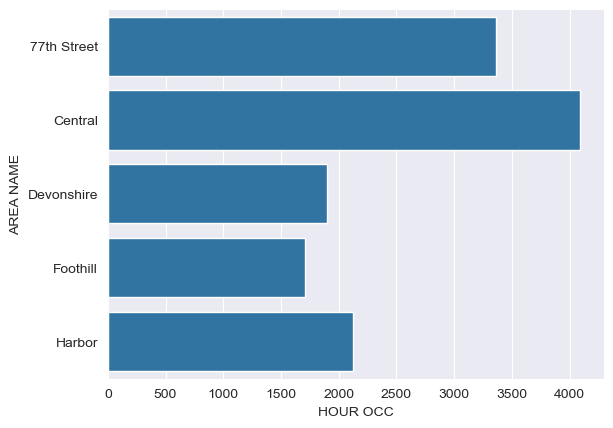

In [6]:
# Filtering crimes committed in the night
night_crimes = crimes[crimes["HOUR OCC"].isin([0,1,2,3,22,23])]

# Grouping night crimes by area
night_crime_count_by_area = night_crimes.groupby("AREA NAME", as_index=False)["HOUR OCC"].count()

# Show areas which have the most night crime
sns.barplot(data=night_crime_count_by_area.head(5), x="HOUR OCC", y="AREA NAME")

### Which area has the largest frequency of night crimes?

In [7]:
# Select the entry with the most night crime (from 10 PM to 3:59 AM)
peak_night_crime = night_crime_count_by_area[night_crime_count_by_area["HOUR OCC"] == night_crime_count_by_area["HOUR OCC"].max()]

# Extract area name from entry
peak_night_crime_location = peak_night_crime.values[0][0]
peak_night_crime_count = peak_night_crime.values[0][1]

print(f"The area {peak_night_crime_location} sees the most frequent nightly crime occurrences with {peak_night_crime_count} crimes.")

The area Central sees the most frequent nightly crime occurrences with 4091 crimes.


# Crimes committed per age group
### Defining age groups

In [8]:
# Defin bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, crimes["Vict Age"].max()]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Segmenting victim age in predefined bins
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels
                              )

### Counting amount of victims per age group

In [9]:
# Counting crimes per victim age bin
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)

Age Bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64
